In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tweets_extraction import extract_tweets_to_csv

In [46]:
data_path = "data/trollcheck/trollcheck/input/"

In [139]:
user_ids = [222825239, 1056018994015166464, 2753159139, 39039862, 1660555704, 2155313744, 36958530]
user_names = ["canokar", "cansimitus", "coronaturkey", "dias", "emrenv", "mahcupyaa", "realsuryaray"]

In [164]:
data = pd.read_json("data/trollcheck/trollcheck/input/canokar/222825239.json", lines=True)
data.head(5)

,in_reply_to_user_id_str,id_str,in_reply_to_user_id,text,created_at,contributors,geo,favorited,source,retweet_count,...,is_quote_status,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities,display_text_range,extended_tweet,quote_count,reply_count,quoted_status_permalink
0,173072831.0,122306026279153664,173072831.0,@PhilipGoose Fabianski was in goal. You could ...,2011-10-07 13:43:23+00:00,NaN,NaN,False,web,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,154171252687372288,NaN,RT @canokar: Sydney B just dominated. A good d...,2012-01-03 12:04:25+00:00,NaN,NaN,False,web,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6255472.0,154192459080024064,6255472.0,@colmflynn 2011: yes. 2010: yes 2009: no. 2008...,2012-01-03 13:28:41+00:00,NaN,NaN,False,web,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,156008060031213568,NaN,"Great job for @WillardFoxton, writing jokes fo...",2012-01-08 13:43:14+00:00,NaN,NaN,False,web,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,159924805959815168,NaN,We needed Cook to stick around. I'm calling it...,2012-01-19 09:06:59+00:00,NaN,NaN,False,web,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
data.columns.values

array(['in_reply_to_user_id_str', 'id_str', 'in_reply_to_user_id', 'text',
       'created_at', 'contributors', 'geo', 'favorited', 'source',
       'retweet_count', 'in_reply_to_screen_name', 'coordinates',
       'entities', 'retweeted', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'place', 'user', 'id', 'truncated',
       'found_troll', 'retweeted_status', 'possibly_sensitive',
       'possibly_sensitive_editable', 'lang', 'favorite_count',
       'filter_level', 'timestamp_ms', 'is_quote_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status',
       'extended_entities', 'display_text_range', 'extended_tweet',
       'quote_count', 'reply_count', 'quoted_status_permalink'],
      dtype=object)

In [221]:
data["created_at"] = pd.to_datetime(data["created_at"]).dt.date
data["created_at"]

0      2011-10-07
1      2012-01-03
2      2012-01-03
3      2012-01-08
4      2012-01-19
          ...    
581    2019-09-20
582    2019-09-21
583    2019-09-22
584    2019-09-24
585    2019-09-26
Name: created_at, Length: 586, dtype: object

In [222]:
# Values only for tweets/retweets from canokar :

followers_count = data[["user", "created_at", "retweeted_status"]]
temp = followers_count["user"].apply(pd.Series)[["id", "screen_name", "followers_count"]]

followers_count = pd.concat([temp, followers_count.drop(["user"], axis=1)], axis=1).rename(columns={"created_at":"date"})
followers_count1 = followers_count.copy()[["id","screen_name", "date", "followers_count"]]
followers_count1 = followers_count1[followers_count["id"] == user_id]
                                                                       
followers_count1.head(5)

,id,screen_name,date,followers_count
0,222825239,canokar,2011-10-07,224
2,222825239,canokar,2012-01-03,303
3,222825239,canokar,2012-01-08,305
4,222825239,canokar,2012-01-19,323
5,222825239,canokar,2012-01-25,326


In [223]:
# Value for retweets not from canokar :

followers_count2 = followers_count.dropna()[followers_count["id"] != user_id]
# Exctract original tweet user info 
temp2 = followers_count2["retweeted_status"].apply(pd.Series)["user"].apply(pd.Series)[["id", "screen_name", "followers_count"]]
followers_count2 = pd.concat([temp2, followers_count2["date"]], axis=1)
followers_count2.head(5)

<ipython-input-223-5ee1f7f0bc4a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  followers_count2 = followers_count.dropna()[followers_count["id"] != user_id]


,id,screen_name,followers_count,date
1,222825239,canokar,300,2012-01-03
22,222825239,canokar,407,2012-11-02
26,222825239,canokar,415,2012-11-19
53,222825239,canokar,666,2014-02-11
58,222825239,canokar,712,2014-03-23


In [224]:
followers_count = pd.concat([followers_count1, followers_count2], axis=0)
followers_count

,id,screen_name,date,followers_count
0,222825239,canokar,2011-10-07,224
2,222825239,canokar,2012-01-03,303
3,222825239,canokar,2012-01-08,305
4,222825239,canokar,2012-01-19,323
5,222825239,canokar,2012-01-25,326
...,...,...,...,...
580,222825239,canokar,2019-09-20,14169
581,222825239,canokar,2019-09-20,14169
583,222825239,canokar,2019-09-22,14194
584,222825239,canokar,2019-09-24,14210


In [225]:
followers_count.describe()

,id,followers_count
count,540.0,540.000000
mean,222825239.0,5518.090741
std,0.0,4405.842932
min,222825239.0,224.000000
25%,222825239.0,1365.000000
50%,222825239.0,5084.500000
75%,222825239.0,8916.000000
max,222825239.0,14223.000000


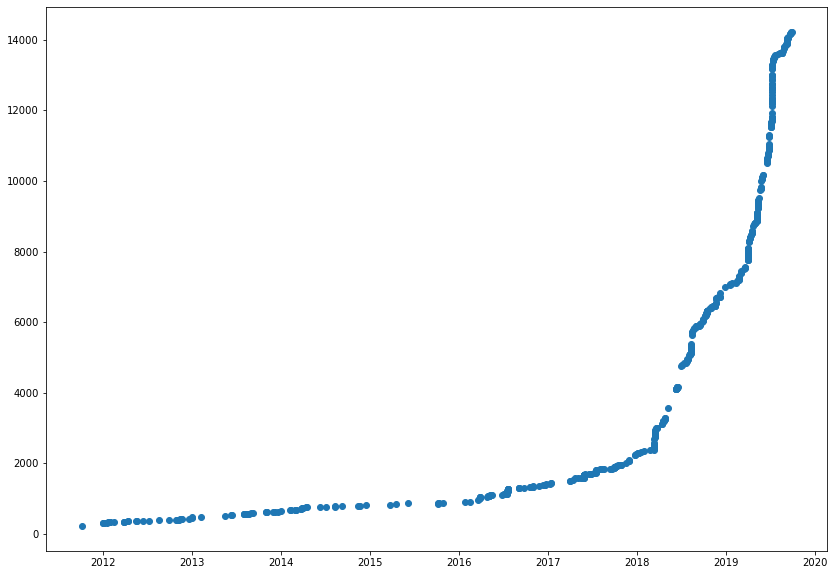

In [226]:
plt.figure(figsize=(14,10))
plt.scatter(x=followers_count.date, y=followers_count.followers_count)

In [75]:
followers_count.to_csv("222825239_followers.csv")

In [66]:
followers_count.describe()

,id,followers_count
count,309.0,309.000000
mean,222825239.0,4522.676375
std,0.0,4228.558956
min,222825239.0,224.000000
25%,222825239.0,1044.000000
50%,222825239.0,2302.000000
75%,222825239.0,7110.000000
max,222825239.0,14223.000000


# Creating the csv using tweets_extraction.py

In [ ]:
data_input_path = "data/trollcheck/trollcheck/input/"

user_ids = [222825239, 1056018994015166464, 2753159139, 39039862, 1660555704, 2155313744, 36958530]
user_names = ["canokar", "cansimitus", "coronaturkey", "dias", "emrenv", "mahcupyaa", "realsuryaray"]

extract_tweets_to_csv(data_path, user_names, user_ids)

In [ ]:
tweets = pd.read_csv("tweets.csv")
tweets.head(10)

## Create MongoDB Json 

In [6]:

import json
from datetime import datetime

base_path = "Data/raw_input/"
files = ["canokar/222825239.json", "cansimitus/1056018994015166464.json", "coronaturkey/2753159139.json", "dias/39039862.json", "emrenv/1660555704.json", "mahcupyaa/2155313744.json", "realsuryaray/36958530.json"]

users = {}

cnt = 0
for file in files:
    df = pd.read_json(base_path+file, lines=True)
    for index, row in df.iterrows():
        
        #Pandas does this automatically
        ## tweet_datetime = datetime.strptime(row['created_at'], '%a %b %d %X %z %Y') #i.e 'Thu Mar 29 10:16:54 +0000 2012'
        ##tweet_ts = datetime.timestamp(tweet_datetime)
        tweet_ts = row['created_at'].timestamp()

        uuid = row['user']['screen_name']
        ## If we got a more recent tweet, update the user's details with the latest infos
        if (not uuid in users) or (users[uuid]['details']['ts'] < tweet_ts):
            users[uuid] = {}
            users[uuid]['details'] = row['user']
            users[uuid]['details']['ts'] = tweet_ts
        
        ## Append to historical data anyways
        if not 'history' in users[uuid]:
            users[uuid]['history'] = []
        users[uuid]['history'].append({'details': row['user'], 'ts': tweet_ts})


        if not 'tweets' in users[uuid]:
            users[uuid]['tweets'] = []
        tweet = {}
        for k in row.keys():
            tweet['ts'] = tweet_ts
            if type(row[k]) == str or type(row[k]) == int:
                tweet[k] = row[k]
        users[uuid]['tweets'].append(tweet)
        cnt +=1
        print("\rProcessed {} tweets".format(cnt), end='', flush=True)
    print(" Loading the next file !")
    cnt = 0


Processed 586 tweets Loading the next file !
Processed 487 tweets Loading the next file !
Processed 5956 tweets Loading the next file !
Processed 221 tweets Loading the next file !
Processed 84 tweets Loading the next file !
Processed 316 tweets Loading the next file !
Processed 69801 tweets Loading the next file !


In [9]:
users_array = []

for idx in users:
    users[idx]['_id'] = idx #_id is the primary key for mongo
    users_array.append(users[idx])

with open('mongo-data.json', 'w') as f:
    json.dump(users_array, f)

In [ ]:
print(users_array[0])

### Import

- run mongo server
- 'use trollcheck'
- mongoimport --db trollcheck --collection users --file ../../mongo-data.json --jsonArray